In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from numpy.random import randn
from numpy import vstack
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import random
from matplotlib import pyplot
from scipy.linalg import sqrtm
import tensorflow as tf
# make a prediction for a new image.
from numpy import argmax
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import glob
import pandas as pd
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
import glob

In [ ]:
import logging
logging.getLogger('tensorflow').disabled = True

# Data

The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [ ]:
(train_images, train_labels), (train_images2, train_labels2) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images = np.concatenate((train_images, train_images))
train_labels = np.concatenate((train_labels, train_labels))

In [ ]:
train_images = np.concatenate((train_images, train_images))
train_labels = np.concatenate((train_labels, train_labels))

print(len(train_images))
print(len(train_labels))

240000
240000


In [ ]:
train_images_original = train_images
train_labels_original = train_labels


train_images_original2 = train_images2
train_labels_original2 = train_labels2

# <u>**Part 1**</u>:

1) 6000 all classes

## Data

In [ ]:
def custom_data_loader(increased, decreased):


  train_images_reduced = []
  train_labels_reduced = []

  count_0 = 0
  count_1 = 0
  count_2 = 0
  count_3 = 0
  count_4 = 0
  count_5 = 0
  count_6 = 0
  count_7 = 0
  count_8 = 0
  count_9 = 0

  classes_num = np.unique(train_labels_original, return_counts=True)[1]

  for idx, labels in enumerate(train_labels_original):
      if labels == 0 and int(decreased) > count_0:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_0 += 1

      if labels == 1 and int(decreased) > count_1:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_1 += 1

      elif labels == 2 and int(decreased) > count_2:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_2 += 1

      elif labels == 3 and int(decreased) > count_3:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_3 += 1

      elif labels == 4 and int(decreased) > count_4:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_4 += 1

      elif labels == 5 and int(increased) > count_5:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_5 += 1

      elif labels == 6 and int(decreased) > count_6:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_6 += 1

      elif labels == 7 and int(decreased) > count_7:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_7 += 1

      elif labels == 8 and int(decreased) > count_8:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_8 += 1

      elif labels == 9 and int(decreased) > count_9:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_9 += 1


      if count_0 == decreased and count_1 == decreased and count_2 == decreased and count_3 == decreased and count_4 == decreased and count_5 == increased and count_6 == decreased and count_7 == decreased and count_8 == decreased and count_9 == decreased :
          break



  return train_images_reduced, train_labels_reduced

Loading 6000 data for each categories for step 1

In [ ]:
train_images, train_labels = custom_data_loader(6000, 6000)

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
num_examples_to_generate = 500
num_epochs = 45

In [ ]:
print("Number of images in Step 1: ", len(train_images))
print("Total Number of classes in Step 1: ", len(train_labels))

Number of images in Step 1:  60000
Total Number of classes in Step 1:  60000


## Number of each classes in Step 1:

In [ ]:
# Number of each classes in Step 1:
data = []
classes_name = np.unique(train_labels, return_counts=True)[0]
classes_num = np.unique(train_labels, return_counts=True)[1]

data = np.column_stack((classes_name,classes_num))

classes_step1 = pd.DataFrame(data, columns = ['Name of Class', 'Number of Class'])
classes_step1

,Name of Class,Number of Class
0,0,6000
1,1,6000
2,2,6000
3,3,6000
4,4,6000
5,5,6000
6,6,6000
7,7,6000
8,8,6000
9,9,6000


## Discriminator Model

The first step is to define the discriminator model.

The model must take a sample image from our dataset as input and output a classification prediction as to whether the sample is real or fake.

This is a binary classification problem:

    Inputs: Image with one channel and 28×28 pixels in size.
    Outputs: Binary classification, likelihood the sample is real (or fake).

The discriminator model has two convolutional layers with 64 filters each, a small kernel size of 3, and larger than normal stride of 2. The model has no pooling layers and a single node in the output layer with the sigmoid activation function to predict whether the input sample is real or fake. The model is trained to minimize the binary cross entropy loss function, appropriate for binary classification.

We will use some best practices in defining the discriminator model, such as the use of LeakyReLU instead of ReLU, using Dropout, and using the Adam version of stochastic gradient descent with a learning rate of 0.0002 and a momentum of 0.5.

The function define_discriminator() below defines the discriminator model and parametrizes the size of the input image.

In [ ]:
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

Running the example first summarizes the model architecture, showing the input and output from each layer.

We can see that the aggressive 2×2 stride acts to down-sample the input image, first from 28×28 to 14×14, then to 7×7, before the model makes an output prediction.

This pattern is by design as we do not use pooling layers and use the large stride as achieve a similar downsampling effect. We will see a similar pattern, but in reverse, in the generator model in the next section.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

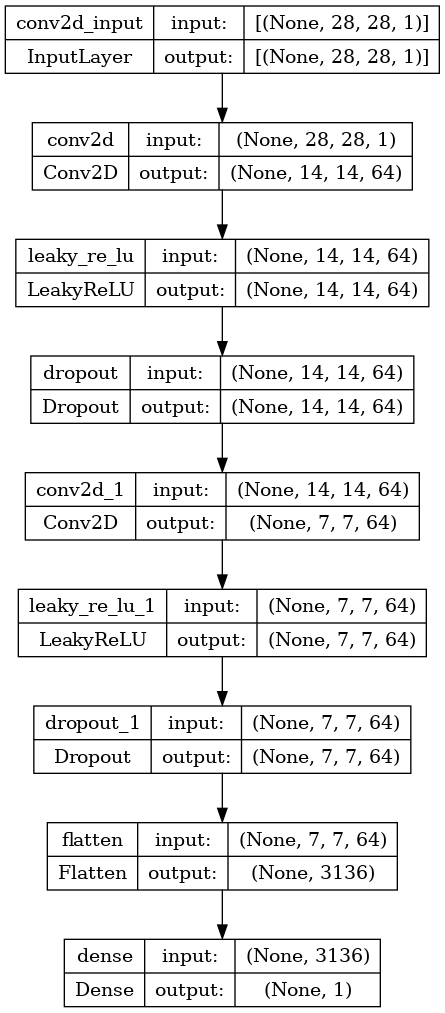

In [ ]:
# define model
model = define_discriminator()
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, 1))
	return X, y

In [ ]:
# generate n fake samples with class labels
def generate_fake_samples(n_samples):
	# generate uniform random numbers in [0,1]
	X = rand(28 * 28 * n_samples)
	# reshape into a batch of grayscale images
	X = X.reshape((n_samples, 28, 28, 1))
	# generate 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

In [ ]:
# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)
		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)
		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)
		# summarize performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))


In [ ]:
# load and prepare mnist training images
def load_real_samples(train_images):
	# expand to 3d, e.g. add channels dimension
	X = expand_dims(train_images, axis=-1)
	# convert from unsigned ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [0,1]
	X = X / 255.0
	return X

In [ ]:
# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples(train_images)
# fit the model
#train_discriminator(model, dataset)

## Generator Model

The generator model is responsible for creating new, fake but plausible images of handwritten digits.

It does this by taking a point from the latent space as input and outputting a square grayscale image.

The latent space is an arbitrarily defined vector space of Gaussian-distributed values, e.g. 100 dimensions. It has no meaning, but by drawing points from this space randomly and providing them to the generator model during training, the generator model will assign meaning to the latent points and, in turn, the latent space, until, at the end of training, the latent vector space represents a compressed representation of the output space, MNIST images, that only the generator knows how to turn into plausible MNIST images.

    Inputs: Point in latent space, e.g. a 100 element vector of Gaussian random numbers.
    Outputs: Two-dimensional square grayscale image of 28×28 pixels with pixel values in [0,1].

Note: we don’t have to use a 100 element vector as input; it is a round number and widely used, but I would expect that 10, 50, or 500 would work just as well.

Developing a generator model requires that we transform a vector from the latent space with, 100 dimensions to a 2D array with 28×28 or 784 values.

There are a number of ways to achieve this but there is one approach that has proven effective at deep convolutional generative adversarial networks. It involves two main elements.

The first is a Dense layer as the first hidden layer that has enough nodes to represent a low-resolution version of the output image. Specifically, an image half the size (one quarter the area) of the output image would be 14×14 or 196 nodes, and an image one quarter the size (one eighth the area) would be 7×7 or 49 nodes.

We don’t just want one low-resolution version of the image; we want many parallel versions or interpretations of the input. This is a pattern in convolutional neural networks where we have many parallel filters resulting in multiple parallel activation maps, called feature maps, with different interpretations of the input. We want the same thing in reverse: many parallel versions of our output with different learned features that can be collapsed in the output layer into a final image. The model needs space to invent, create, or generate.

Therefore, the first hidden layer, the Dense, needs enough nodes for multiple low-resolution versions of our output image, such as 128.

In [ ]:
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 128)      262272    
 ranspose)                                            

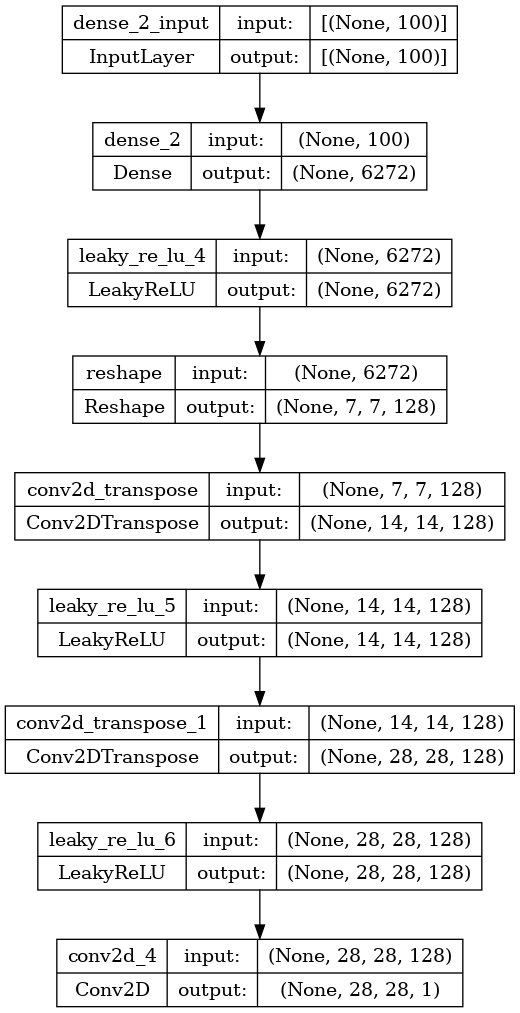

In [ ]:
# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

## Latent Space

The array of random numbers can then be reshaped into samples, that is n rows with 100 elements per row. The generate_latent_points() function below implements this and generates the desired number of points in the latent space that can be used as input to the generator model.

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

We can update the generate_fake_samples() function from the previous section to take the generator model as an argument and use it to generate the desired number of samples by first calling the generate_latent_points() function to generate the required number of points in latent space as input to the model.

The updated generate_fake_samples() function is listed below and returns both the generated samples and the associated class labels.

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = zeros((n_samples, 1))
	return X, y

In [ ]:
# generate samples
n_samples = 25
# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)

1/1 [==============================] - 5s 5s/step


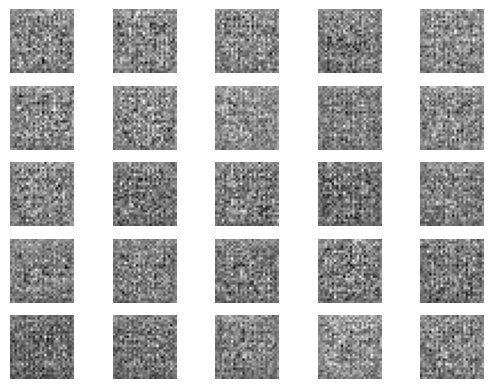

In [ ]:
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
	# define subplot
	pyplot.subplot(5, 5, 1 + i)
	# turn off axis labels
	pyplot.axis('off')
	# plot single image
	pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
# show the figure
plt.show()

## Define GAN



The define_gan() function below takes as arguments the already-defined generator and discriminator models and creates the new logical third model subsuming these two models. The weights in the discriminator are marked as not trainable, which only affects the weights as seen by the GAN model and not the standalone discriminator model.

The GAN model then uses the same binary cross entropy loss function as the discriminator and the efficient Adam version of stochastic gradient descent with the learning rate of 0.0002 and momentum 0.5, recommended when training deep convolutional GANs.

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)

Running the example first creates a summary of the composite model.

In [ ]:
# summarize gan model
gan_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 28, 28, 1)         1164289   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 40705     
                                                                 
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________


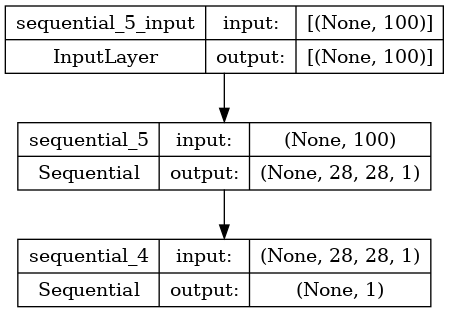

In [ ]:
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

The train_gan() function below demonstrates this, although is pretty simple as only the generator will be updated each epoch, leaving the discriminator with default model weights.

In [ ]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=num_epochs, n_batch=256):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

There are a few things to note in this model training function.

First, the number of batches within an epoch is defined by how many times the batch size divides into the training dataset. We have a dataset size of 60K samples, so with rounding down, there are 234 batches per epoch.

The discriminator model is updated once per batch by combining one half a batch of fake and real examples into a single batch via the vstack() NumPy function. You could update the discriminator with each half batch separately (recommended for more complex datasets) but combining the samples into a single batch will be faster over a long run, especially when training on GPU hardware.

Finally, we report the loss each batch. It is critical to keep an eye on the loss over batches. The reason for this is that a crash in the discriminator loss indicates that the generator model has started generating rubbish examples that the discriminator can easily discriminate.

Monitor the discriminator loss and expect it to hover around 0.5 to 0.8 per batch on this dataset. The generator loss is less critical and may hover between 0.5 and 2 or higher on this dataset.

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=num_epochs, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))

In [ ]:
checkpoint_dir = './step1'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

As we are evaluating the discriminator on 100 generated MNIST images, we can plot all 100 images as a 10 by 10 grid. The save_plot() function below implements this, again saving the resulting plot with a unique filename based on the epoch number.

In [ ]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data 2
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename = checkpoint_dir+'/generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

## Evaluate GAN Model Performance



We can define a function called summarize_performance() function that will summarize the performance of the discriminator model. It does this by retrieving a sample of real MNIST images, as well as generating the same number of fake MNIST images with the generator model, then evaluating the classification accuracy of the discriminator model on each sample and reporting these scores.

In [ ]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = checkpoint_dir+'/generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

This function can be called from the train() function based on the current epoch number, such as every 10 epochs.

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=num_epochs, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		start = time.time()
        # enumerate batches over the training set

		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
		print('epoch_num:%d, %d/%d, d_loss=%.3f, g_loss=%.3f, seconds=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss, time.time()-start))
		# evaluate the model performance, sometimes
		if (i+1) % 5 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [ ]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples(train_images)

The chosen configuration results in the stable training of both the generative and discriminative model.

The model performance is reported every batch, including the loss of both the discriminative (d) and generative (g) models.

In [ ]:
train(g_model, d_model, gan_model, dataset, latent_dim)

4/4 [==============================] - 0s 2ms/step
epoch_num:1, 234/234, d_loss=0.601, g_loss=0.762, seconds=32.386
4/4 [==============================] - 0s 3ms/step
epoch_num:2, 234/234, d_loss=0.711, g_loss=0.751, seconds=27.167
4/4 [==============================] - 0s 2ms/step
epoch_num:3, 234/234, d_loss=0.696, g_loss=0.690, seconds=27.138
4/4 [==============================] - 0s 2ms/step
epoch_num:4, 234/234, d_loss=0.684, g_loss=0.736, seconds=26.705
4/4 [==============================] - 0s 2ms/step
epoch_num:5, 234/234, d_loss=0.687, g_loss=0.711, seconds=26.531
4/4 [==============================] - 0s 11ms/step
>Accuracy real: 29%, fake: 56%
4/4 [==============================] - 0s 2ms/step
epoch_num:6, 234/234, d_loss=0.658, g_loss=0.811, seconds=27.624
4/4 [==============================] - 0s 3ms/step
epoch_num:7, 234/234, d_loss=0.689, g_loss=0.696, seconds=26.068
4/4 [==============================] - 0s 2ms/step
epoch_num:8, 234/234, d_loss=0.703, g_loss=0.694, seco

## Generator Model to Generate Images


This involves first loading the model from file, then using it to generate images. The generation of each image requires a point in the latent space as input.

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [ ]:
# # create and save a plot of generated images (reversed grayscale)
# def save_plot(examples, n):
# 	# plot images
# 	for i in range(n * n):
# 		# define subplot
# 		#pyplot.subplot(n, n, 1 + i)
# 		# turn off axis
# 		pyplot.axis('off')
# 		# plot raw pixel data
# 		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
# 	pyplot.show()

## Generate images from model -- 500 images for each step1

4/4 [==============================] - 0s 3ms/step


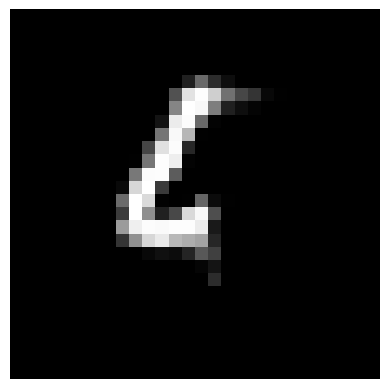

In [ ]:
for i in range(num_examples_to_generate):
      if int(num_epochs) == 5:
            num_epochs = "05"
    # load model
      model = load_model(checkpoint_dir+'/generator_model_0'+str(num_epochs)+'.h5')
      # generate images
      latent_points = generate_latent_points(100, num_examples_to_generate)
      # generate images
      X = model.predict(latent_points)
      plt.axis('off')
      plt.imshow(X[i, :, :, 0], cmap='gray')
      plt.savefig(checkpoint_dir+'/generated_image_{:04d}.png'.format(i))

## Classification Model

In [ ]:
# Classification Model Path
classification_model_path = "./mnist_classification.h5"

## Load train and test dataset

The load_dataset() function implements these behaviors and can be used to load the dataset.

In [ ]:
def load_dataset():
	# load dataset
	(train_images, train_labels), (train_images2, train_labels2) = mnist.load_data()
	# reshape dataset to have a single channel
	train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
	train_images2 = train_images2.reshape((train_images2.shape[0], 28, 28, 1))
	# one hot encode target values
	train_labels = to_categorical(train_labels)
	train_labels2 = to_categorical(train_labels2)
	return train_images, train_labels, train_images2, train_labels2

## Scale pixels

We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

The prep_pixels() function below implements these behaviors and is provided with the pixel values for both the train and test datasets that will need to be scaled.

In [ ]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

## Define cnn model

We need to define a baseline convolutional neural network model for the problem.

The model has two main aspects: the feature extraction front end comprised of convolutional and pooling layers, and the classifier backend that will make a prediction.

For the convolutional front-end, we can start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. The filter maps can then be flattened to provide features to the classifier.

Given that the problem is a multi-class classification task, we know that we will require an output layer with 10 nodes in order to predict the probability distribution of an image belonging to each of the 10 classes. This will also require the use of a softmax activation function. Between the feature extractor and the output layer, we can add a dense layer to interpret the features, in this case with 100 nodes.

All layers will use the ReLU activation function and the He weight initialization scheme, both best practices.

We will use a conservative configuration for the stochastic gradient descent optimizer with a learning rate of 0.01 and a momentum of 0.9. The categorical cross-entropy loss function will be optimized, suitable for multi-class classification, and we will monitor the classification accuracy metric, which is appropriate given we have the same number of examples in each of the 10 classes.

The define_model() function below will define and return this model.

In [ ]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

## Evaluate a model using k-fold cross-validation

The model is defined, we need to evaluate it.

The model will be evaluated using five-fold cross-validation. The value of k=5 was chosen to provide a baseline for both repeated evaluation and to not be so large as to require a long running time. Each test set will be 20% of the training dataset, or about 12,000 examples, close to the size of the actual test set for this problem.

The training dataset is shuffled prior to being split, and the sample shuffling is performed each time, so that any model we evaluate will have the same train and test datasets in each fold, providing an apples-to-apples comparison between models.

We will train the baseline model for a modest 10 training epochs with a default batch size of 32 examples. The test set for each fold will be used to evaluate the model both during each epoch of the training run, so that we can later create learning curves, and at the end of the run, so that we can estimate the performance of the model. As such, we will keep track of the resulting history from each run, as well as the classification accuracy of the fold.

The evaluate_model() function below implements these behaviors, taking the training dataset as arguments and returning a list of accuracy scores and training histories that can be later summarized.

In [ ]:
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		model.save(classification_model_path)
        # summarize the model
		model.summary()
		# plot classification model
		print(plot_model(model, to_file='classification_plot.png', show_shapes=True, show_layer_names=True))
  		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

## Plot diagnostic learning curves

There are two key aspects to present: the diagnostics of the learning behavior of the model during training and the estimation of the model performance. These can be implemented using separate functions.

First, the diagnostics involve creating a line plot showing model performance on the train and test set during each fold of the k-fold cross-validation. These plots are valuable for getting an idea of whether a model is overfitting, underfitting, or has a good fit for the dataset.

We will create a single figure with two subplots, one for loss and one for accuracy. Blue lines will indicate model performance on the training dataset and orange lines will indicate performance on the hold out test dataset. The summarize_diagnostics() function below creates and shows this plot given the collected training histories.

In [ ]:
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

## Summarize model performance

Next, the classification accuracy scores collected during each fold can be summarized by calculating the mean and standard deviation. This provides an estimate of the average expected performance of the model trained on this dataset, with an estimate of the average variance in the mean. We will also summarize the distribution of scores by creating and showing a box and whisker plot.

The summarize_performance() function below implements this for a given list of scores collected during model evaluation.

In [ ]:
def summarize_performance_training(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	#plt.boxplot(scores)
	#plt.show()

## Run the test harness for evaluating a model

We need a function that will drive the test harness.

This involves calling all of the define functions.

In [ ]:
def run_test_harness():
	# load dataset
	train_images, train_labels, train_images2, train_labels2 = load_dataset()
	# prepare pixel data
	train_images, train_images2 = prep_pixels(train_images, train_images2)
	# evaluate model
	scores, histories = evaluate_model(train_images, train_labels)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance_training(scores)

## Start Classification Model Training

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1024)            

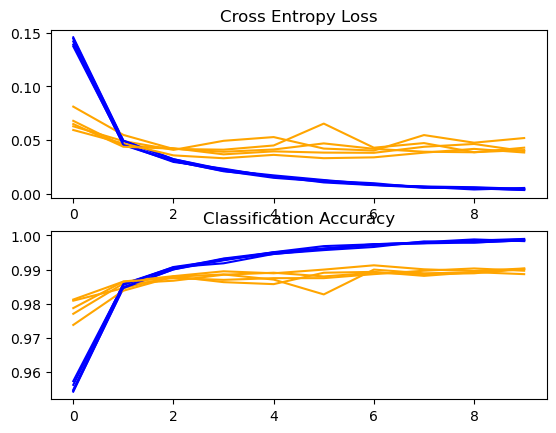

Accuracy: mean=98.982 std=0.062, n=5


In [ ]:
run_test_harness()

Running the example prints the classification accuracy for each fold of the cross-validation process. This is helpful to get an idea that the model evaluation is progressing.

## Test images generated by GAN via classification model

## load and prepare the image

We can now load the final model and evaluate it on the hold out images generated by GAN.

This is something we might do if we were interested in presenting the performance of the chosen model to project stakeholders.

The model can be loaded via the load_model() function.

The complete example of loading the saved model and evaluating it on the test dataset is listed below.

In [ ]:
def load_image(filename):
	# load the image
	img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

## load an image and predict the class

In [ ]:
def run_example(take_image):
	# load the image
	img = load_image(take_image)
	# load model
	model = load_model(classification_model_path)
	# predict the class
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	return digit

In [ ]:
total_classes = []

for generated_image in glob.glob("./step1/generated_image_*.png"):
  generated_image_class = run_example(generated_image)
  total_classes.append(generated_image_class)

1/1 [==============================] - 0s 122ms/step


## Generated classes from Step1

In [ ]:
step1_df = pd.DataFrame(total_classes, columns = ['Generated Class'])
step1_df.value_counts()

   Generated  Class
0          6    105
1          9     80
2          4     75
3          3     65
4          1     60
5          5     30
6          2     25
7          8     25
8          0     20
9          7     15


## Calculate frechet inception distance for Step1

The Frechet Inception Distance score, or FID for short, is a metric that calculates the distance between feature vectors calculated for real and generated images.

In [ ]:
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)

In [ ]:
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
	# calculate activations
	act1 = model.predict(images1)
	act2 = model.predict(images2)
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

In [ ]:
train_images_FID = train_images_original[:500]
train_images_FID2 = train_images_original2[:500]

images1 = train_images_FID
images2 = train_images_FID2

print('Loaded', images1.shape, images2.shape)

Loaded (500, 28, 28) (500, 28, 28)


In [ ]:
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (28,28,1))
images2 = scale_images(images2, (28,28,1))
print('Scaled', images1.shape, images2.shape)

Scaled (500, 28, 28, 1) (500, 28, 28, 1)


In [ ]:
fid_model = load_model(classification_model_path)

In [ ]:
# calculate fid
fid = calculate_fid(fid_model, images1, images2)
print('FID: %.3f' % fid)

16/16 [==============================] - 0s 2ms/step
FID: 0.004


# <u>**Part 2**</u>:

2) Now we increase the number of images of Class 5 to 12000 and other are 5333.

## Data

In [ ]:
train_images_6000, train_labels_6000 = custom_data_loader(12000, 5333)

train_images_6000 = np.array(train_images_6000)
train_labels_6000 = np.array(train_labels_6000)

In [ ]:
print("Total images in step2: ", len(train_images_6000))

Total images in step2:  59997


In [ ]:
# train_images_6000 = train_images_6000.reshape(train_images_6000.shape[0], 28, 28, 1).astype('float32')
# train_images_6000 = (train_images_6000 - 127.5) / 127.5  # Normalize the images to [-1, 1]
# print(len(train_images_6000))

## Number of each classes in Step 2:

In [ ]:
# Number of each classes in Step 2:
data = []
classes_name = np.unique(train_labels_6000, return_counts=True)[0]
classes_num = np.unique(train_labels_6000, return_counts=True)[1]

data = np.column_stack((classes_name,classes_num))

classes_step2 = pd.DataFrame(data, columns = ['Name of Class', 'Number of Class'])
classes_step2

,Name of Class,Number of Class
0,0,5333
1,1,5333
2,2,5333
3,3,5333
4,4,5333
5,5,12000
6,6,5333
7,7,5333
8,8,5333
9,9,5333


In [ ]:
#BUFFER_SIZE = len(train_images_6000)

In [ ]:
# train_dataset_6000 = tf.data.Dataset.from_tensor_slices(train_images_6000).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
# len(train_dataset_6000)

In [ ]:
# Make folder if not exist
checkpoint_dir = './step2'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

## Start training step2

In [ ]:
# load image data
dataset = load_real_samples(train_images_6000)

# Training
train(g_model, d_model, gan_model, dataset, latent_dim)

4/4 [==============================] - 0s 2ms/step
epoch_num:1, 234/234, d_loss=0.690, g_loss=0.727, seconds=27.974
4/4 [==============================] - 0s 2ms/step
epoch_num:2, 234/234, d_loss=0.679, g_loss=0.732, seconds=26.286
4/4 [==============================] - 0s 2ms/step
epoch_num:3, 234/234, d_loss=0.690, g_loss=0.706, seconds=26.647
4/4 [==============================] - 0s 3ms/step
epoch_num:4, 234/234, d_loss=0.692, g_loss=0.739, seconds=26.673
4/4 [==============================] - 0s 2ms/step
epoch_num:5, 234/234, d_loss=0.694, g_loss=0.695, seconds=26.673
4/4 [==============================] - 0s 2ms/step
>Accuracy real: 74%, fake: 74%
4/4 [==============================] - 0s 2ms/step
epoch_num:6, 234/234, d_loss=0.683, g_loss=0.718, seconds=27.616
4/4 [==============================] - 0s 2ms/step
epoch_num:7, 234/234, d_loss=0.682, g_loss=0.708, seconds=26.741
4/4 [==============================] - 0s 3ms/step
epoch_num:8, 234/234, d_loss=0.686, g_loss=0.721, secon

## Generate image from model -- 500 images step2

4/4 [==============================] - 0s 3ms/step


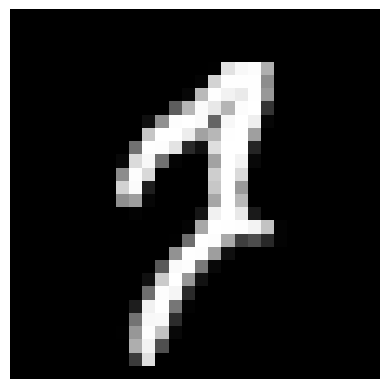

In [ ]:
for i in range(num_examples_to_generate):
      if int(num_epochs) == 5:
            num_epochs = "05"
    # load model
      model = load_model(checkpoint_dir+'/generator_model_0'+str(num_epochs)+'.h5')
      # generate images
      latent_points = generate_latent_points(100, num_examples_to_generate)
      # generate images
      X = model.predict(latent_points)
      plt.axis('off')
      plt.imshow(X[i, :, :, 0], cmap='gray')
      plt.savefig(checkpoint_dir+'/generated_image_{:04d}.png'.format(i))

## Generated classes from Step2

In [ ]:
total_classes = []

for generated_image in glob.glob("./step2/generated_image_*.png"):
  generated_image_class = run_example(generated_image)
  total_classes.append(generated_image_class)

1/1 [==============================] - 0s 71ms/step


In [ ]:
step2_df = pd.DataFrame(total_classes, columns = ['Generated Class'])
step2_df.value_counts()

   Generated  Class
0          6    110
1          9     85
2          0     75
3          4     65
4          1     45
5          3     45
6          8     25
7          2     20
8          5     20
9          7     10


## FID for Step2:

In [ ]:
train_images_FID = train_images_original[501:1000]
train_images_FID2 = train_images_original2[501:1000]

images1 = train_images_FID
images2 = train_images_FID2

print('Loaded', images1.shape, images2.shape)

# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (28,28,1))
images2 = scale_images(images2, (28,28,1))
print('Scaled', images1.shape, images2.shape)

# calculate fid
fid = calculate_fid(fid_model, images1, images2)
print('FID: %.3f' % fid)

Loaded (499, 28, 28) (499, 28, 28)
Scaled (499, 28, 28, 1) (499, 28, 28, 1)
16/16 [==============================] - 0s 2ms/step
FID: 0.014


# <u>**Part 3**</u>:
3) Now we increase the number of images of Class 5 to 18000 and other are 4666.

## Load Data

In [ ]:
train_images_12000, train_labels_12000 = custom_data_loader(18000, 4666)

train_images_12000 = np.array(train_images_12000)
train_labels_12000 = np.array(train_labels_12000)

In [ ]:
print("Total images in step3: ", len(train_images_12000))

Total images in step3:  59994


## Number of each classes in Step 3:

In [ ]:
# Number of each classes in Step 3:
data = []
classes_name = np.unique(train_labels_12000, return_counts=True)[0]
classes_num = np.unique(train_labels_12000, return_counts=True)[1]

data = np.column_stack((classes_name,classes_num))

classes_step3 = pd.DataFrame(data, columns = ['Name of Class', 'Number of Class'])
classes_step3

,Name of Class,Number of Class
0,0,4666
1,1,4666
2,2,4666
3,3,4666
4,4,4666
5,5,18000
6,6,4666
7,7,4666
8,8,4666
9,9,4666


In [ ]:
# Make folder if not exist
checkpoint_dir = './step3'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

## Start training step3:

In [ ]:
# load image data
dataset = load_real_samples(train_images_12000)

train(g_model, d_model, gan_model, dataset, latent_dim)

4/4 [==============================] - 0s 2ms/step
epoch_num:1, 234/234, d_loss=0.692, g_loss=0.712, seconds=26.472
4/4 [==============================] - 0s 2ms/step
epoch_num:2, 234/234, d_loss=0.688, g_loss=0.703, seconds=26.669
4/4 [==============================] - 0s 2ms/step
epoch_num:3, 234/234, d_loss=0.692, g_loss=0.695, seconds=27.656
4/4 [==============================] - 0s 2ms/step
epoch_num:4, 234/234, d_loss=0.687, g_loss=0.699, seconds=27.706
4/4 [==============================] - 0s 2ms/step
epoch_num:5, 234/234, d_loss=0.697, g_loss=0.718, seconds=26.013
4/4 [==============================] - 0s 2ms/step
>Accuracy real: 11%, fake: 93%
4/4 [==============================] - 0s 3ms/step
epoch_num:6, 234/234, d_loss=0.695, g_loss=0.703, seconds=26.180
4/4 [==============================] - 0s 2ms/step
epoch_num:7, 234/234, d_loss=0.695, g_loss=0.743, seconds=26.139
4/4 [==============================] - 0s 2ms/step
epoch_num:8, 234/234, d_loss=0.688, g_loss=0.708, secon

## Generate image from model -- 500 images step3

4/4 [==============================] - 0s 3ms/step


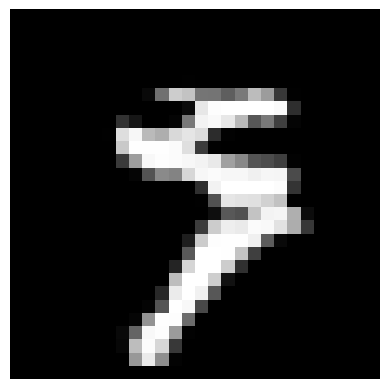

In [ ]:
for i in range(num_examples_to_generate):
      if int(num_epochs) == 5:
            num_epochs = "05"
    # load model
      model = load_model(checkpoint_dir+'/generator_model_0'+str(num_epochs)+'.h5')
      # generate images
      latent_points = generate_latent_points(100, num_examples_to_generate)
      # generate images
      X = model.predict(latent_points)
      plt.axis('off')
      plt.imshow(X[i, :, :, 0], cmap='gray')
      plt.savefig(checkpoint_dir+'/generated_image_{:04d}.png'.format(i))

## Generated classes from Step3

In [ ]:
total_classes = []

for generated_image in glob.glob("./step3/generated_image_*.png"):
  generated_image_class = run_example(generated_image)
  total_classes.append(generated_image_class)

1/1 [==============================] - 0s 72ms/step


In [ ]:
step3_df = pd.DataFrame(total_classes, columns = ['Generated Class'])
step3_df.value_counts()

   Generated  Class
0          4     85
1          6     80
2          5     75
3          3     60
4          9     60
5          1     50
6          0     45
7          8     30
8          2     10
9          7      5


## FID for Step3:

In [ ]:
train_images_FID = train_images_original[1000:1500]
train_images_FID2 = train_images_original2[1000:1500]

images1 = train_images_FID
images2 = train_images_FID2

print('Loaded', images1.shape, images2.shape)

# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (28,28,1))
images2 = scale_images(images2, (28,28,1))
print('Scaled', images1.shape, images2.shape)

# calculate fid
fid = calculate_fid(fid_model, images1, images2)
print('FID: %.3f' % fid)

Loaded (500, 28, 28) (500, 28, 28)
Scaled (500, 28, 28, 1) (500, 28, 28, 1)
16/16 [==============================] - 0s 2ms/step
FID: 0.003


# <u>**Part 4**</u>:
4) Now we increase the number of images of Class 5 to 24000 and other are 4000.

## Data

In [ ]:
def custom_data_loader(increased, decreased):


  train_images_reduced = []
  train_labels_reduced = []

  count_0 = 0
  count_1 = 0
  count_2 = 0
  count_3 = 0
  count_4 = 0
  count_5 = 0
  count_6 = 0
  count_7 = 0
  count_8 = 0
  count_9 = 0
  count_0_0 = 0

  classes_num = np.unique(train_labels_original, return_counts=True)[1]

  for idx, labels in enumerate(train_labels_original):
      if labels == 0 and int(decreased) > count_0:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_0 += 1

      if labels == 1 and int(decreased) > count_1:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_1 += 1

      elif labels == 2 and int(decreased) > count_2:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_2 += 1

      elif labels == 3 and int(decreased) > count_3:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_3 += 1

      elif labels == 4 and int(decreased) > count_4:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_4 += 1

      elif labels == 5 and int(increased) > count_5:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          if count_0_0 < 4000:
            train_images_reduced.append(train_images_original[idx])
            train_labels_reduced.append(labels)
            count_0_0 += 1
            count_5 += 1
          count_5 += 1

      elif labels == 6 and int(decreased) > count_6:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_6 += 1

      elif labels == 7 and int(decreased) > count_7:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_7 += 1

      elif labels == 8 and int(decreased) > count_8:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_8 += 1

      elif labels == 9 and int(decreased) > count_9:
          train_images_reduced.append(train_images_original[idx])
          train_labels_reduced.append(labels)
          count_9 += 1


      if count_0 == decreased and count_1 == decreased and count_2 == decreased and count_3 == decreased and count_4 == decreased and count_5 == increased and count_6 == decreased and count_7 == decreased and count_8 == decreased and count_9 == decreased :
          break



  return train_images_reduced, train_labels_reduced

In [ ]:
train_images_18000, train_labels_18000 = custom_data_loader(24000, 4000)

train_images_18000 = np.array(train_images_18000)
train_labels_18000 = np.array(train_labels_18000)

In [ ]:
print("Total images in step3: ", len(train_images_18000))

Total images in step3:  60000


In [ ]:
# train_images_18000 = train_images_18000.reshape(train_images_18000.shape[0], 28, 28, 1).astype('float32')
# train_images_18000 = (train_images_18000 - 127.5) / 127.5  # Normalize the images to [-1, 1]
# print(len(train_images_18000))

## Number of each classes in Step 4:

In [ ]:
# Number of each classes in Step 4:
data = []
classes_name = np.unique(train_labels_18000, return_counts=True)[0]
classes_num = np.unique(train_labels_18000, return_counts=True)[1]

data = np.column_stack((classes_name,classes_num))

classes_step4 = pd.DataFrame(data, columns = ['Name of Class', 'Number of Class'])
classes_step4

,Name of Class,Number of Class
0,0,4000
1,1,4000
2,2,4000
3,3,4000
4,4,4000
5,5,24000
6,6,4000
7,7,4000
8,8,4000
9,9,4000


In [ ]:
# Make folder if not exist
checkpoint_dir = './step4'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

## Start training step4:

In [ ]:
# load image data
dataset = load_real_samples(train_images_18000)

train(g_model, d_model, gan_model, dataset, latent_dim)

4/4 [==============================] - 0s 2ms/step
epoch_num:1, 225/225, d_loss=0.696, g_loss=0.702, seconds=24.307
4/4 [==============================] - 0s 2ms/step
epoch_num:2, 225/225, d_loss=0.697, g_loss=0.684, seconds=24.887
4/4 [==============================] - 0s 2ms/step
epoch_num:3, 225/225, d_loss=0.690, g_loss=0.699, seconds=28.058
4/4 [==============================] - 0s 3ms/step
epoch_num:4, 225/225, d_loss=0.691, g_loss=0.689, seconds=26.175
4/4 [==============================] - 0s 2ms/step
epoch_num:5, 225/225, d_loss=0.695, g_loss=0.691, seconds=25.662
4/4 [==============================] - 0s 2ms/step
>Accuracy real: 47%, fake: 62%
4/4 [==============================] - 0s 3ms/step
epoch_num:6, 225/225, d_loss=0.692, g_loss=0.695, seconds=25.166
4/4 [==============================] - 0s 2ms/step
epoch_num:7, 225/225, d_loss=0.686, g_loss=0.685, seconds=25.279
4/4 [==============================] - 0s 2ms/step
epoch_num:8, 225/225, d_loss=0.692, g_loss=0.704, secon

## Generate image from model -- 500 images step4

4/4 [==============================] - 0s 2ms/step


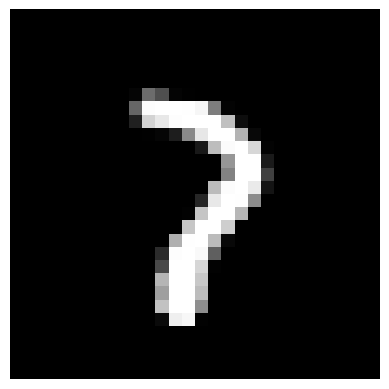

In [ ]:
for i in range(num_examples_to_generate):
      if int(num_epochs) == 5:
            num_epochs = "05"
    # load model
      model = load_model(checkpoint_dir+'/generator_model_0'+str(num_epochs)+'.h5')
      # generate images
      latent_points = generate_latent_points(100, num_examples_to_generate)
      # generate images
      X = model.predict(latent_points)
      plt.axis('off')
      plt.imshow(X[i, :, :, 0], cmap='gray')
      plt.savefig(checkpoint_dir+'/generated_image_{:04d}.png'.format(i))

## Generated classes from Step4

In [ ]:
total_classes = []

for generated_image in glob.glob("./step4/generated_image_*.png"):
  generated_image_class = run_example(generated_image)
  total_classes.append(generated_image_class)

1/1 [==============================] - 0s 92ms/step


In [ ]:
step4_df = pd.DataFrame(total_classes, columns = ['Generated Class'])
step4_df.value_counts()

   Generated  Class
0          6    115
1          4     75
2          0     65
3          9     65
4          5     55
5          3     45
6          8     30
7          1     25
8          2     15
9          7     10


## FID Step4:

In [ ]:
train_images_FID = train_images_original[1500:2000]
train_images_FID2 = train_images_original2[1500:2000]

images1 = train_images_FID
images2 = train_images_FID2

print('Loaded', images1.shape, images2.shape)

# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (28,28,1))
images2 = scale_images(images2, (28,28,1))
print('Scaled', images1.shape, images2.shape)

# calculate fid
fid = calculate_fid(fid_model, images1, images2)
print('FID: %.3f' % fid)

Loaded (500, 28, 28) (500, 28, 28)
Scaled (500, 28, 28, 1) (500, 28, 28, 1)
16/16 [==============================] - 0s 2ms/step
FID: 0.007


# <u>**Plots**<u>

Text(40, 11, 'Stage 4')

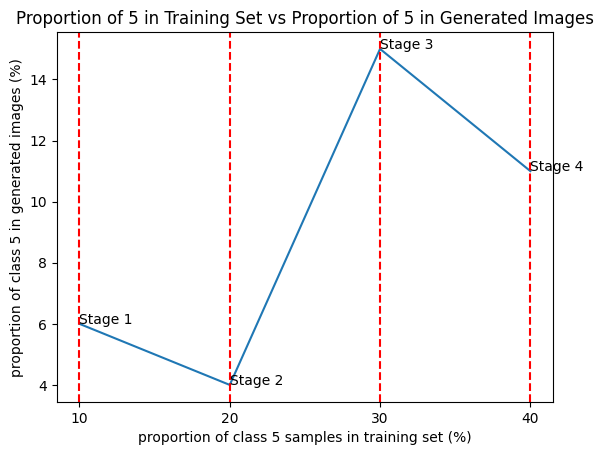

In [ ]:
five_training_percentage = [10, 20, 30, 40]
five_generated_percentage = [6, 4, 15, 11]
plt.plot(five_training_percentage, five_generated_percentage, label = "class '5'")

labels = ['10', '20', '30', '40']

plt.xlabel('proportion of class 5 samples in training set (%)')
plt.ylabel('proportion of class 5 in generated images (%)')
plt.title('Proportion of 5 in Training Set vs Proportion of 5 in Generated Images')
plt.xticks(five_training_percentage, labels)
plt.axvline(10, color='r', linestyle='dashed')
plt.text(10, 6, 'Stage 1', fontsize=10)
plt.axvline(20, color='r', linestyle='dashed')
plt.text(20, 4, 'Stage 2', fontsize=10)
plt.axvline(30, color='r', linestyle='dashed')
plt.text(30, 15, 'Stage 3', fontsize=10)
plt.axvline(40, color='r', linestyle='dashed')
plt.text(40, 11, 'Stage 4', fontsize=10)

# Finish

In [ ]:
print("---------- Finish ----------")

---------- Finish ----------
